<a href="https://colab.research.google.com/github/karan1289/Image-recognition-CIFAR10-/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np # linear algebra
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# **Unpickling the dataset**

In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [ ]:
batch_1=unpickle('data_batch_1')
batch_2=unpickle('data_batch_2')
batch_3=unpickle('data_batch_3')
batch_4=unpickle('data_batch_4')
batch_5=unpickle('data_batch_5')
test_batch=unpickle('test_batch')

In [ ]:
batch1_data=batch_1[b'data'].reshape(10000,3,32,32).transpose(0,2,3,1)
batch2_data=batch_2[b'data'].reshape(10000,3,32,32).transpose(0,2,3,1)
batch3_data=batch_3[b'data'].reshape(10000,3,32,32).transpose(0,2,3,1)
batch4_data=batch_4[b'data'].reshape(10000,3,32,32).transpose(0,2,3,1)
batch5_data=batch_5[b'data'].reshape(10000,3,32,32).transpose(0,2,3,1)
test_data=test_batch[b'data'].reshape(10000,3,32,32).transpose(0,2,3,1)

batch1_labels=batch_1[b'labels']
batch2_labels=batch_2[b'labels']
batch3_labels=batch_3[b'labels']
batch4_labels=batch_4[b'labels']
batch5_labels=batch_5[b'labels']
test_labels=test_batch[b'labels']

train_images=np.concatenate((batch1_data,batch2_data,batch3_data,batch4_data,batch5_data),axis=0)
train_labels_data=np.concatenate((batch1_labels,batch2_labels,batch3_labels,batch4_labels,batch5_labels),axis=0)

# Visualizing the data

In [ ]:
train_images.shape

(50000, 32, 32, 3)

1

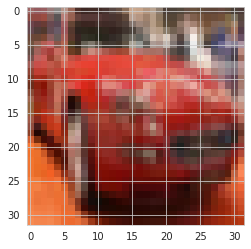

In [ ]:
plt.imshow(train_images[5],cmap='binary')
train_labels_data[5]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


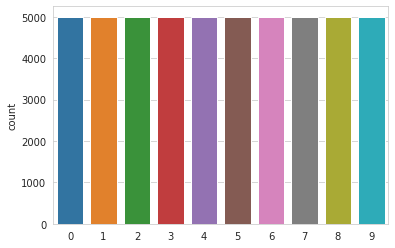

In [ ]:
sns.countplot(train_labels_data)

In [ ]:
#labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

9

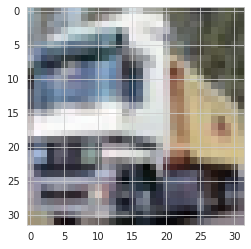

In [ ]:
plt.imshow(train_images[1],cmap='binary')
train_labels_data[1]

In [ ]:
def label(num):
  if num==0:
    return 'Airplane'
  elif num==1:
    return 'Automobile'
  elif num==2:
    return 'Bird'
  elif num==3:
    return 'Cat'
  elif num==4:
    return 'Deer'
  elif num==5:
    return 'Dog'
  elif num==6:
    return 'Frog'
  elif num==7:
    return 'Horse'
  elif num==8:
    return 'Ship'
  elif num==9:
    return 'Truck'

The image is of Truck
The image is of Truck


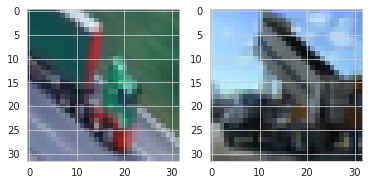

In [ ]:
plt.subplot(1,2,1)
plt.imshow(train_images[50],cmap='binary')
print(f'The image is of {label(train_labels_data[50])}')
plt.subplot(1,2,2)
plt.imshow(test_data[50],cmap='binary')
print(f'The image is of {label(test_labels[50])}')

In [ ]:
train_labels_data

array([6, 9, 9, ..., 9, 1, 1])

# One Hot Encoding

In [ ]:
from keras.utils import to_categorical
train_label=to_categorical(train_labels_data)

In [ ]:
Test_labels=to_categorical(test_labels)

# Preprocessing the data

In [ ]:
datagen=ImageDataGenerator( featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)

In [ ]:
train_data=datagen.flow(train_images, train_label, batch_size=32)
validation_data=datagen.flow(test_data, Test_labels, batch_size=32)

# Convolutional Neural Network

In [ ]:
cnn=tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(input_shape=[32,32,3],filters=32,kernel_size=(3,3),activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(strides=2,pool_size=(2,2)))
cnn.add(BatchNormalization())

In [ ]:
cnn.add(tf.keras.layers.Conv2D(input_shape=[32,32,3],filters=32,kernel_size=(3,3),activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(strides=2,pool_size=(2,2)))
cnn.add(BatchNormalization())

In [ ]:
cnn.add(tf.keras.layers.Conv2D(input_shape=[32,32,3],filters=32,kernel_size=(3,3),activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(strides=2,pool_size=(2,2)))
cnn.add(BatchNormalization())

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(784,activation='relu'))
cnn.add(tf.keras.layers.Dense(784,activation='relu'))
cnn.add(tf.keras.layers.Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.fit(train_data,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 89s 57ms/step - loss: 0.8920 - accuracy: 0.6858
Epoch 2/20
1563/1563 [==============================] - 92s 59ms/step - loss: 0.8515 - accuracy: 0.6998
Epoch 3/20
1563/1563 [==============================] - 89s 57ms/step - loss: 0.8291 - accuracy: 0.7077
Epoch 4/20
1563/1563 [==============================] - 89s 57ms/step - loss: 0.7992 - accuracy: 0.7201
Epoch 5/20
1563/1563 [==============================] - 89s 57ms/step - loss: 0.7767 - accuracy: 0.7281
Epoch 6/20
1563/1563 [==============================] - 89s 57ms/step - loss: 0.7435 - accuracy: 0.7401
Epoch 7/20
1563/1563 [==============================] - 89s 57ms/step - loss: 0.7310 - accuracy: 0.7454
Epoch 8/20
1563/1563 [==============================] - 89s 57ms/step - loss: 0.7040 - accuracy: 0.7518
Epoch 9/20
1563/1563 [==============================] - 89s 57ms/step - loss: 0.6949 - accuracy: 0.7558
Epoch 10/20
1563/1563 [==============================] - 89s 57m

# Predicting the data

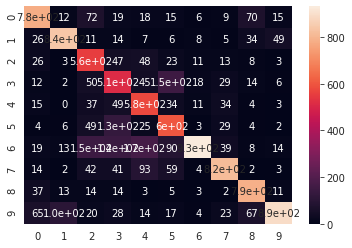

In [ ]:
prediction=cnn.predict_classes(test_data)
target_label=np.argmax(Test_labels,1)
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(prediction,target_label),annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(prediction,target_label))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78      1018
           1       0.84      0.84      0.84      1004
           2       0.56      0.75      0.64       739
           3       0.51      0.61      0.56       840
           4       0.58      0.76      0.65       765
           5       0.60      0.71      0.65       852
           6       0.93      0.59      0.72      1577
           7       0.82      0.76      0.79      1077
           8       0.79      0.89      0.83       891
           9       0.89      0.72      0.80      1237

    accuracy                           0.73     10000
   macro avg       0.73      0.74      0.73     10000
weighted avg       0.76      0.73      0.74     10000



# TEST

The Prediction of image is Dog


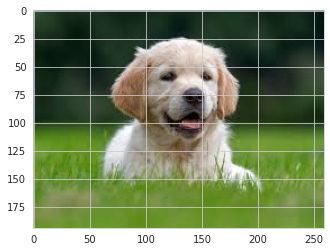

In [ ]:
from keras.preprocessing import image
img=image.load_img('dog.jpg',target_size=(32,32))
raw_image=image.img_to_array(img)
test_image=np.expand_dims(raw_image,axis=0)
print(f'The Prediction of image is {label(cnn.predict_classes(test_image))}')
ti=plt.imread('dog.jpg')
plt.imshow(ti)

The Prediction of image is Bird


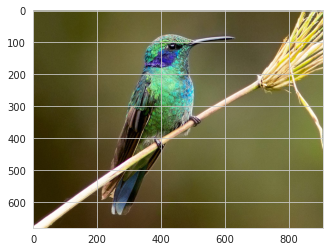

In [ ]:
img=image.load_img('bird2.jpg',target_size=(32,32))
raw_image=image.img_to_array(img)
test_image=np.expand_dims(raw_image,axis=0)
print(f'The Prediction of image is {label(cnn.predict_classes(test_image))}')
ti=plt.imread('bird2.jpg')
plt.imshow(ti)

The Prediction of image is Airplane


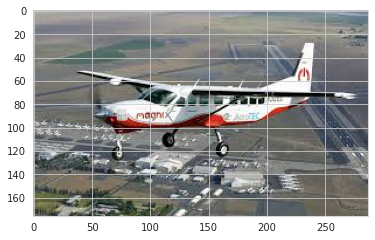

In [ ]:
img=image.load_img('plane.jpg',target_size=(32,32))
raw_image=image.img_to_array(img)
test_image=np.expand_dims(raw_image,axis=0)
print(f'The Prediction of image is {label(cnn.predict_classes(test_image))}')
ti=plt.imread('plane.jpg')
plt.imshow(ti)